In [ ]:
import random

types = ["places", "names"]

places = ["The Upper Room", "Jerusalem", "Church", "Rome"]
names = ["Jesus", "Desciples", "Paul"]


def get_random_type():
    return random.choice(types)

def get_response(chosentype):
    return random.choice(eval(chosentype))

randtype = get_random_type()
print(randtype)
print(get_response(randtype))

In [ ]:
example_list = [
    ['a','b','c'],
    ['f','g','h'],
    ['i','j','k'],
]

s = '\n'.join([str(tuple(i)) for i in example_list])
print(s)

In [ ]:
a = [[['7', '3', 'SELL', 'chair_1', '30.00'], ['17', '4', 'BID', 'chair_1', '34.00']]]
b = [[['14', '5', 'SELL', 'toaster_1', '14.50', '30']]]
c = [[['10', '1', 'SELL', 'radio_1', '10.00', '30'], ['13', '5', 'BID', 'radio_1', '12.50'], ['16', '6', 'BID', 'radio_1', '12.50']]]
d = [[['12', '4', 'SELL', 'TV_1', '200.00', '35'], ['15', '8', 'BID', 'TV_1', '250.00'], ['18', '1', 'BID', 'TV_1', '150.00'], ['19', '3', 'BID', 'TV_1', '200.00'], ['21', '3', 'BID', 'TV_1', '300.00']]]
e = [[['11', '3', 'SELL', 'transistor_1', '15.00', '30'], ['20', '7', 'BID', 'transistor_1', '20.00']]]

def get_min_auc(auc):
    d = [j for i in auc[0][1:] for j in i if len(j.split('.'))>1]
    try: return min(d)
    except: return 0

print(get_min_auc(a))
print(get_min_auc(b))
print(get_min_auc(c))
print(get_min_auc(d))
print(get_min_auc(e))

In [ ]:
a = "abijkabccbakfgba"

def isp(s):
    return s == s[::-1]

res = (a[i: j] for i in range(len(a)) for j in range(i + 1, len(a) + 1))
palindromes = sorted([i for i in res if isp(i) and len(i)>1], key = lambda x: len(x), reverse=True)[0]
palindromes

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.DataFrame({
    'Mountain Range': ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C', 'D', 'D', 'D', 'D'], 
    'Peak': ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's'], 
    'Height above sea level': [2340, 3050, 4220, 2675, 2980, 3300, 3405, 3410, 2970, 2840, 2780, 3140, 3210, 2885, 3000, 3110, 2640, 2635]
    })

In [ ]:
df[df['Mountain Range']=='A'].nlargest(3, 'Height above sea level')

In [ ]:
g = df.groupby('Mountain Range')['Height above sea level'].apply(lambda x: np.sum(x.nlargest(3))).reset_index()
print(g)

g.nlargest(1, 'Height above sea level')['Mountain Range'][0]

In [ ]:
g.nlargest(1, 'Height above sea level')['Mountain Range'][0]

In [ ]:
data = pd.DataFrame({'Name':['Joe','Joe','Jackson','Jackson'],'Computer':['MAC','HP','MAC','HP'],'Data':[10,5,20,15]})

In [ ]:
pd.pivot(data, index='Name',columns='Computer', values='Data')

In [ ]:
print(data.set_index(['Name','Computer']).unstack(-1))

In [ ]:
Change = np.random.randint(-2,4,size=(2,5))
pct_change = np.random.randint(1,3,size=(2,5))
Change_after_calculation = np.zeros_like(pct_change)

for p in range(5):
    for n in range(2):
        if Change[n,p] < 0:
            Change_after_calculation[n,p] = (1+pct_change[n,p]) *  Change[n,p]
        else:
            Change_after_calculation[n,p] = Change[n,p]

In [ ]:

\pct_change

In [ ]:

Change_after_calculation

In [ ]:
for p in range(5):
    for n in range(2):
        if Change[n,p] < 0:
            Change_after_calculation[n,p] = (1+pct_change[n,p]) *  Change[n,p]
        else:
            Change_after_calculation[n,p] = Change[n,p]

In [ ]:
Change_after_calculation

In [ ]:
(Change>=0)*Change +(Change<0)*(pct_change+1)*Change

In [ ]:
colors  = ['red', 'blue', 'yellow' , 'purple']
things = ['apple', 'pickle', 'tomato' , 'rainbow', 'book']

corpus = ['i ate a red apple.', 'There are so many colors in the rainbow.', 'the monster was purple and green.', 'the pickle is very green', 'the kid read the book the little red riding hood', 'in the book the wizard of oz there was a yellow brick road.', 'tom has a green thumb and likes working in a garden.' ]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
out = cv.fit_transform(corpus).toarray() #apply countvectorizer

combined = colors+things  #combine all your topics

c = [(k,v) for k,v in cv.vocabulary_.items() if k in combined] #get indexes for all the items from all topics

cdf = pd.DataFrame(out[:,[i[1] for i in c]], columns=[i[0] for i in c]).T  #Filter cv dataframe for all items

print(cdf)

In [ ]:
def get_similary_table(topic=None):
    if topic==None:
        df = cdf
    else:
        df = cdf.loc[cdf.index.isin(topic)]  #filter by topic
    cnd = df.values
    similarity = cnd.T@cnd #Take dot product to get similarty matrix
    dd = pd.DataFrame(similarity, index=corpus, columns=corpus) #convert to a dataframe
    return dd

In [ ]:
def get_similar_review(s, topic):
    df = cdf.loc[cdf.index.isin(topic)] #filter by topic
    cnd = df.values
    similarity = cnd.T@cnd #Take dot product to get similarty matrix
    np.fill_diagonal(similarity,0) #set diagonal elements to 0, to avoid same sentence being returned as output
    dd = pd.DataFrame(similarity, index=corpus, columns=corpus) #convert to a dataframe
    return dd.loc[s].idxmax(axis=0) #filter by sentence and get column name with max value

In [ ]:
s = 'i ate a red apple.'
get_similar(s, colors)

In [ ]:
s = 'the kid read the book the little red riding hood'
get_similar(s, things)

In [ ]:
get_similary_table()

In [ ]:
a = pd.DataFrame([[1,2,2],[3,4,5]], columns=['A','B','C'])
print(a)

In [ ]:
grp = a.groupby([True]*len(a))
grp

In [ ]:
data = np.array([['country','time','x','y'],
                ['USA',1, 5, 10],
                ['USA',2, 5, 12],
                ['USA',3,6, 13],
                ['CAN',1,2, 2],
                ['CAN',2,2, 3],
                ['CAN',3,4, 5]],                
               )

df = pd.DataFrame(data=data[1:,1:],
                  index=data[1:,0],
                  columns=data[0,1:])

df1 = df.reset_index().set_index(['time','index']).unstack(-1)
print(df1)

In [ ]:
#df1.columns = df1.columns.map('_'.join)

In [ ]:
df1

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits = 2, max_train_size=3)

for train_index, test_index in tscv.split(df1):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = df1.iloc[train_index].stack(-1).reset_index()[X_cols].to_numpy(), df1.iloc[test_index].stack(-1).reset_index()[X_cols].to_numpy()
    y_train, y_test = df1.iloc[train_index].stack(-1).reset_index()[y_cols].to_numpy(), df1.iloc[test_index].stack(-1).reset_index()[y_cols].to_numpy()

In [ ]:
df1

In [ ]:
X_cols = ['time', 'index', 'x']
y_cols = ['y']

In [ ]:
print('For - TRAIN: [0 1] TEST: [2]')
print(" ")
print("X_train:")
print(X_train)
print(" ")
print("X_test:")
print(X_test)
print(" ")
print("y_train:")
print(y_train)
print(" ")
print("y_test:")
print(y_test)

In [ ]:
print(sorted(mylist, key=lambda x: x.count('0'), reverse=True))

In [ ]:
import pandas as pd

df = pd.DataFrame({'ID': [111, 222, 222, 333, 333, 444, 444, 444, 555, 555, 555, 555], 
                   'Name': ['David','Carl','Carl','Jane','Jane','Mike','Mike','Mike','Jake','Jake','Jake','Jake'],
                  'LE': ['AAA','AAA','BBB','BBB','CCC','AAA','BBB','CCC','AAA','BBB','CCC','DDD']})

print(df)

In [ ]:
print(df[~(df.duplicated(['LE']) & (df['LE']=='AAA'))].reset_index(drop=True))

In [ ]:
ID  |State  |Invoice|Price|Email 
1000|Texas  |1      |2    |texas@test.com
1000|Texas  |2      |5    |texas@test.com
1001|Alabama|3      |4    |alabama@test.com
1000|Texas  |4      |8    |texas@test.com
1002|Georgia|5      |3    |georgia@test.com
1001|Alabama|6      |6    |alabama@test.com

In [ ]:
df = pd.DataFrame({'ID':[1000,1000,1001,1000,1002,1001],
 'State':['Texas','Texas','Alabama','Texas','Georgia','Alabama'],
'Invoice':[1,2,3,4,5,6],
'Price':[2,5,4,8,3,6],
'Email':['texas@test.com','texas@test.com','alabama@test.com','texas@test.com','georgia@test.com','alabama@test.com']})

In [ ]:
df1, df2, df3 = [i[1] for i in df.groupby(['ID'])]

In [ ]:
print(df3)

In [ ]:
df1, df2, df3 = [df[df['ID']==i] for i in df['ID'].unique()]

In [ ]:
df3

In [ ]:
df

In [ ]:
a = np.array([0, 1, 2, 10, 11, 20, 21, 22, 23])
chunks = np.array([3, 2, 4])
repeats = np.array([1, 3, 2])

In [ ]:
a

In [ ]:
a

In [ ]:
a = np.random.randint(0,50, size=(100000,))
chunks = np.random.randint(0,10, size=(4000,))
repeats = np.random.randint(0,10, size=(4000,))

In [ ]:
def create_ranges(starts, ends, l):
        clens = l.cumsum()
        ids = np.ones(clens[-1],dtype=int)
        ids[0] = starts[0]
        ids[clens[:-1]] = starts[1:] - ends[:-1]+1
        out = ids.cumsum()
        return out

def f():
    s = np.r_[0,chunks.cumsum()]
    starts = a[np.repeat(s[:-1],repeats)]
    l = np.repeat(chunks, repeats)
    ends = starts+l
    out = create_ranges(starts, ends, l)

In [ ]:
#Divakar
%timeit f()

In [ ]:
#Akshay
%timeit np.concatenate(np.repeat(np.split(a, np.cumsum(chunks))[:-1], repeats))

In [ ]:
#Vladi
%timeit result = np.concatenate([ np.tile(tbl, rpt) for tbl, rpt in zip(np.split(a, np.cumsum(chunks[:-1])), repeats) ])

In [ ]:
import itertools

w = np.random.randint(1,400,size=1000) #np.array([1, 2, 3, 4])
x = np.random.randint(1,400,size=1000) #np.array([1, 2, 3, 4])

In [ ]:
#[i for i in itertools.product(w,x) if i[0]<i[1]]

In [ ]:
%timeit [i for i in itertools.product(w,x) if i[0]<i[1]]

In [ ]:
def f():
    r,c = np.nonzero(w[:,None]<x) # or np.less.outer(w,x)
    np.c_[w[r], x[c]]
    
%timeit f()

In [ ]:
a = np.array([0,0,1,1,2,0])

In [ ]:
np.transpose(np.nonzero(a))

In [ ]:
import scipy
import pickle

I = np.eye(10000)  #Had 10000 nonzero values along diagonal
S = scipy.sparse.csr_matrix(I)
S

In [ ]:
#Pickle dump
file = open("S.pickle",'wb') #160kb
pickle.dump(S, file)

#Pickle load
file = open("S.pickle",'rb') 
S = pickle.load(file)

In [ ]:
def a():
    l
    h

In [ ]:
S

In [ ]:
S.toarray()

In [ ]:
pos = np.array([[0, 1, 2, 3],
       [2, 3, 4, 5],
       [0, 1, 6, 7],
       [2, 3, 6, 7],
       [2, 3, 8, 9],
       [4, 5, 8, 9],
       [6, 7, 8, 9]])

pos = pos.reshape((7,1,4))
pos

In [ ]:
af = np.zeros((7,2*nnos,4))

In [ ]:
for i in range(7):
    print(i,pos[i],pos[0])

In [ ]:
df = pd.DataFrame({'A':[0,0,1], 
                   'B':[1,0,0], 
                   'C':[0,0,0], 
                   'D':[1,0,1], 
                   'E':[1,0,1]})

In [ ]:
df['new_column'] = df.apply(lambda x: ', '.join(list(x[x!=0].index)), axis=1)

print(df)

In [ ]:
df.dot(df.columns)

In [ ]:
df

In [ ]:
df.columns

In [ ]:
df['new_column'] = (df @ df.columns).str.join(', ')

In [ ]:
print(df)

In [ ]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])

In [ ]:
x.shape

In [ ]:
x[:,:,None].shape

In [ ]:
x[None,:,None,:,None].shape

In [ ]:
s = pd.Series(['A','B','C','B','D','A','C'])

In [ ]:
cols = ['A','B','C','D']

print(pd.get_dummies(s).astype(bool)[cols])

In [ ]:
s.str

In [ ]:
s.array

In [ ]:
s

In [ ]:
from skfeature.function.similarity_based import fisher_score
from sklearn.datasets import load_diabetes

db = load_diabetes()
y_train = db.target
X_train = db.data

score = fisher_score.fisher_score(X_train, y_train, mode='rank')
#array([1, 7, 3, 6, 2, 0, 9, 8, 5, 4])
score

In [ ]:
fisher_score.reverse_argsort(score)

In [ ]:
np.sort(score)

In [ ]:
np.argsort(score)[0:5]

In [ ]:
np.argsort(score)

In [ ]:
X_train[:, np.argsort(score)[0:5]]

In [ ]:
import scipy.io

In [ ]:
from io import StringIO

text = """
Date        p_id    points          roll_sum                                
2016-07-29  57        11            11
2016-08-01  57        9             20
2017-01-12  57        5             25
2017-10-23  57        18            23
"""

df = pd.read_csv(StringIO(text), sep='\t')

df

In [ ]:
pd.read_clipboard(sep='\s\s+')

In [ ]:
pd.read_clipboard()

In [ ]:
print_out = '\n'.join([' '.join([str(j) for j in i]) for i in [[1,2,3],[4,5,6]]])
print(print_out)

In [ ]:
matrices = [[matrix_A[i][k] + matrix_B[i][k] for k in range(len(Matrix_A[0]))] for i in range(len(matrix_A))]

In [ ]:
output = [[a[i][j] + b[i][j] for j in range(len(a[0]))] for i in range(len(a))]
print_out = '\n'.join([' '.join([str(j) for j in i]) for i in output])
print(print_out)

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_clipboard().drop(['..','valn'], axis=1)

In [ ]:
df1 = df.set_index(['key1', 'key2', 'key3'])

In [ ]:
df2 = pd.concat([df1]*3, axis=1)
df2.columns = df1.columns

In [ ]:
df2.to_dict()

In [ ]:
list(range(3))+list(df1.columns)

In [ ]:
[m+str(n) for m,n in zip(b,a)]

In [ ]:
df1.columns.str.cat()

In [ ]:
df1.columns

## KINU!!

### Z112`E#A31``````````ESADS12````````````````````````````````````6YHN 564REE234

In [ ]:
df = pd.read_clipboard()

In [ ]:
import pandas as pd
from fuzzywuzzy import fuzz, process

emailsdb = list(df['Names'])

l = []
for i in range(len(emailsdb)) :
    email = emailsdb[i]
    emailsdb.pop(i)
    print("comparing:",[email],'->',emailsdb)
    result = process.extractBests(email, emailsdb, score_cutoff=85, limit=100)
    l.append(result)
    emailsdb.insert(i, email)
    
print(l)

In [ ]:
variables = ['A1,A1','A2,B2','A1,C2','B3,B3','C4,C4']#*100000

In [ ]:
%timeit [i for i in variables if len(set(i))>3]

In [ ]:
import numpy as np

In [ ]:
import itertools

In [ ]:
%timeit [i for i in variables if len(set(i.split(',')))>1]

In [ ]:
def find_same_with_seperator(variables, SEPERATOR = ','):
    same_vars = []
    for v in variables:
        # Finding seperator index
        seperator_index = 0
        for i in range(len(v)):
            if SEPERATOR == v[i]:
                break
            seperator_index += 1
        # If no seperator
        if 0 == seperator_index:
            continue
        # Comparing parts
        before_seperator = 0
        after_seperator  = seperator_index + 1
        the_same = True
        while after_seperator < len(v):
            if v[before_seperator] != v[after_seperator]:
                the_same = False
                break
            before_seperator += 1
            after_seperator  += 1
        if the_same:
            same_vars.append(v)
    return same_vars

%timeit find_same_with_seperator(variables)

In [ ]:
%timeit [v for v in variables if v.split(',')[0]!=v.split(',')[1].replace(" ", "")]

In [ ]:
%timeit [a for a in variables if a.split(',')[0]!=a.split(',')[1].replace(" ", "")]

In [ ]:
import re

In [ ]:
df = pd.read_clipboard(sep='|')

In [ ]:
df.columns = [i.strip() for i in list(df.columns)]

In [ ]:
txt = df['InvestmentDesc'][0].strip()
dictRepStrings = {"1st lien": "1l", "first lien": "1l", "2nd lien": "2l", "second lien": "2l", "term loan": "tl"}

In [ ]:
text

In [ ]:
def replace_all(text, dictReplace):
    rep = dict((re.escape(k), v) for k, v in dictReplace.items())
    pattern = re.compile("|".join(rep.keys()))
    text = pattern.sub(lambda m: rep[re.escape(m.group(0))], text) 
    return text

dictRepStrings = {"1st lien": "1l", "first lien": "1l", "2nd lien": "2l", "second lien": "2l", "term loan": "tl"}
df['NewCol'] = df['InvestmentDesc'].apply(replace_all, args=[dictRepStrings]) #modified apply function
df

In [ ]:
dictRepStrings = {"1st lien": "1l", "first lien": "1l", "2nd lien": "2l", "second lien": "2l", "term loan": "tl"}
df['NewCol'] = df['InvestmentDesc'].apply(replace_all, args=[dictRepStrings])
df

In [ ]:
print(df)

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import collections
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

%matplotlib inline
#%config InlineBackend.figure_format = 'retina'

iris = load_iris()
plt.rcParams['figure.figsize'] = (10, 8)

#some more code
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2)

# Some feature values are present in train and absent in test and vice-versa.
#y = df_train['Should_Vacation_there']
#df_train, df_test = intersect_features(train=df_train, test=df_test)
#df_train

#training a decision tree
dt = DecisionTreeClassifier(criterion='entropy', random_state=17)
dt.fit(X_train, y_train)

#displaying the tree
plot_tree(dt, feature_names=iris.feature_names, filled=True,
         class_names=iris.target_names);

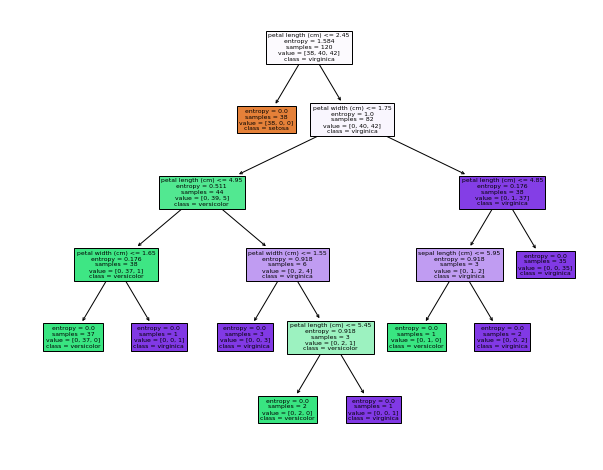